## Likert-Scale Rating

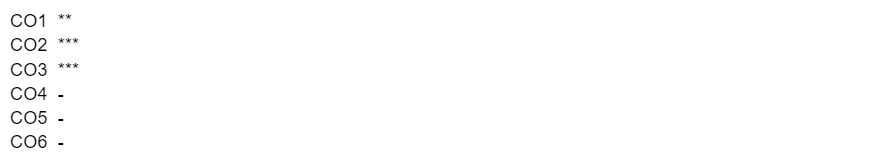

## Functions to print few items present in lists and dictionaries

In [1]:
def list_head(l):
    for i in range(5):
        print(l[i])
        print(" ")
    
    print("--------------------------------------------------------------------------------- ")
    print(" ")
        
def dict_head(d):
    dl = list(d.items())
    for i in range(5):
        print(dl[i])
        print(" ")
    
    print("--------------------------------------------------------------------------------- ")
    print(" ")


## Importing libraries

In [2]:
import numpy as np
import tensorflow as tf
import re
import time
import pandas as pd
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords

## Importing data sets.

In [3]:
data = open('Dataset/movie_lines.txt', encoding = 'utf-8', errors = 'ignore').read().split('\n')
exchanges = open('Dataset/movie_conversations.txt', encoding = 'utf-8', errors = 'ignore').read().split('\n')


#df = pd.read_table("Dataset/movie_lines.txt",delimiter = " +++$+++ ")

In [4]:
list_head(data)

L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!
 
L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!
 
L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.
 
L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?
 
L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.
 
--------------------------------------------------------------------------------- 
 


In [5]:
list_head(exchanges)

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']
 
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']
 
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']
 
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']
 
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']
 
--------------------------------------------------------------------------------- 
 


## Extracting dictionary of format {line_id: line}

In [6]:
dict_id_line={}

for line in data:
    buff = line.split(' +++$+++ ')
    if len(buff) == 5:
        dict_id_line[buff[0]] = buff[4]

dict_head(dict_id_line)


('L1045', 'They do not!')
 
('L1044', 'They do to!')
 
('L985', 'I hope so.')
 
('L984', 'She okay?')
 
('L925', "Let's go.")
 
--------------------------------------------------------------------------------- 
 


## Extracting exchanges lists containg line Ids of lines in the exhanges

In [7]:
exchange_ids = []

for exchange in exchanges:
    buff_elements = exchange.split(' +++$+++ ')[-1][1:-1]
    ids = buff_elements.replace("'", "").replace(" ", "") # avoiding list within a list using [1:-1]
    
    exchange_ids.append(ids.split(','))


list_head(exchange_ids)

['L194', 'L195', 'L196', 'L197']
 
['L198', 'L199']
 
['L200', 'L201', 'L202', 'L203']
 
['L204', 'L205', 'L206']
 
['L207', 'L208']
 
--------------------------------------------------------------------------------- 
 


## Generating Q&A from  list of exchange_ids 

In [8]:
questions = []
answers = []
for exchange in exchange_ids:
    l = len(exchange)-1
    i=0
    while(i<l):
        questions.append(dict_id_line[exchange[i]])
        answers.append(dict_id_line[exchange[i+1]])
        i+=1
list_head(questions)
print("")
print("")
list_head(answers)


Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.
 
Well, I thought we'd start with pronunciation, if that's okay with you.
 
Not the hacking and gagging and spitting part.  Please.
 
You're asking me out.  That's so cute. What's your name again?
 
No, no, it's my fault -- we didn't have a proper introduction ---
 
--------------------------------------------------------------------------------- 
 


Well, I thought we'd start with pronunciation, if that's okay with you.
 
Not the hacking and gagging and spitting part.  Please.
 
Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?
 
Forget it.
 
Cameron.
 
--------------------------------------------------------------------------------- 
 


## Cleaning the text and handling case sensitivity in questions and answers

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"\.", " . ", text)
    text = re.sub(r"\?", " ? ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"/", " / ", text)
    text = re.sub(r",", " , ", text)
    text = re.sub(r'"', ' " ', text)
    text = re.sub(r"-", " - ", text)
    
    

    text = re.sub(r"[-()\"#/@;:<>{}+=~|.?,]", "", text)
    text = re.sub(' +', ' ', text)
    return text


In [10]:
clean_questions = []
for question in questions:
    clean_questions.append(clean_text(question))
    
clean_answers = []
for answer in answers:
    clean_answers.append(clean_text(answer))

list_head(clean_questions)
print(" ")
print(" ")
list_head(clean_questions)


can we make this quick roxanne korrine and andrew barrett are having an incredibly horrendous public break up on the quad again 
 
well i thought we would start with pronunciation if that is okay with you 
 
not the hacking and gagging and spitting part please 
 
you are asking me out that is so cute what is your name again 
 
no no it's my fault we didn't have a proper introduction 
 
--------------------------------------------------------------------------------- 
 
 
 
can we make this quick roxanne korrine and andrew barrett are having an incredibly horrendous public break up on the quad again 
 
well i thought we would start with pronunciation if that is okay with you 
 
not the hacking and gagging and spitting part please 
 
you are asking me out that is so cute what is your name again 
 
no no it's my fault we didn't have a proper introduction 
 
--------------------------------------------------------------------------------- 
 


In [11]:

for question in questions:
    clean_questions.append(clean_text(question))
    
clean_answers = []
for answer in answers:
    clean_answers.append(clean_text(answer))

list_head(clean_questions)
print(" ")
print(" ")
list_head(clean_questions)


can we make this quick roxanne korrine and andrew barrett are having an incredibly horrendous public break up on the quad again 
 
well i thought we would start with pronunciation if that is okay with you 
 
not the hacking and gagging and spitting part please 
 
you are asking me out that is so cute what is your name again 
 
no no it's my fault we didn't have a proper introduction 
 
--------------------------------------------------------------------------------- 
 
 
 
can we make this quick roxanne korrine and andrew barrett are having an incredibly horrendous public break up on the quad again 
 
well i thought we would start with pronunciation if that is okay with you 
 
not the hacking and gagging and spitting part please 
 
you are asking me out that is so cute what is your name again 
 
no no it's my fault we didn't have a proper introduction 
 
--------------------------------------------------------------------------------- 
 


## Calculating frequency of  each word

In [12]:
word2count = {}
for q in tqdm(clean_questions):
    words = nltk.word_tokenize(q)
    for word in words :
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

for a in tqdm(clean_answers):
    words = nltk.word_tokenize(a)
    for word in words :
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

dict_head(word2count)

100%|███████████████████████████████████████████████████████████████████████| 221616/221616 [00:15<00:00, 14018.64it/s]


('can', 39103)
 
('we', 61052)
 
('make', 10117)
 
('this', 51880)
 
('quick', 544)
 
--------------------------------------------------------------------------------- 
 


## Generating an unique integer to each unique word (including tags).

In [13]:
ques_encode = {}
assigned_int = 0
for word, count in word2count.items():
        ques_encode[word] = assigned_int
        assigned_int += 1

ans_encode = {}
assigned_int = 0
for word, count in word2count.items():
        ans_encode[word] = assigned_int
        assigned_int += 1


In [14]:
tokens = ['<BOS>', '<EOS>','<NULL>','<STOPWORD>']
for token in tokens:
    ques_encode[token] = len(ques_encode) + 1
    ans_encode[token] = len(ans_encode) + 1

In [15]:
dict_head(ques_encode)

print("")
print("")

dict_head(ans_encode)

('can', 0)
 
('we', 1)
 
('make', 2)
 
('this', 3)
 
('quick', 4)
 
--------------------------------------------------------------------------------- 
 


('can', 0)
 
('we', 1)
 
('make', 2)
 
('this', 3)
 
('quick', 4)
 
--------------------------------------------------------------------------------- 
 


## Adding BOS and EOS at the beginning and ending of the answers respectively.

In [16]:
tagged_answers = ["<BOS>" + line + "<EOS>" for line in clean_answers]
list_head(tagged_answers)


<BOS>well i thought we would start with pronunciation if that is okay with you <EOS>
 
<BOS>not the hacking and gagging and spitting part please <EOS>
 
<BOS>okay then how 'bout we try out some french cuisine saturday night <EOS>
 
<BOS>forget it <EOS>
 
<BOS>cameron <EOS>
 
--------------------------------------------------------------------------------- 
 


## Using above calculated unique integers to encode questions and answers 

In [17]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stopwords_list = stopwords.words('english')
encoded_questions = []
for question in clean_questions:
    temp = []
    for word in question.split():
        if word not in ques_encode :
            temp.append(ques_encode['<NULL>'])
        elif word in stopwords_list:
            temp.append(ques_encode['<STOPWORD>'])
        else :
            temp.append(ques_encode[word])
        encoded_questions.append(temp)
    
encoded_answers = []
for answer in tagged_answers:
    temp = []
    for word in answer.split():
        if word not in ans_encode:
            temp.append(ans_encode['<NULL>'])
            
        elif word in stopwords_list:
            temp.append(ans_encode['<STOPWORD>'])
           
        else:
            temp.append(ans_encode[word])
    encoded_answers.append(temp)


In [19]:
list_head(encoded_questions)

list_head(encoded_answers)

[52140, 52140, 2, 52140, 4, 5, 6, 52140, 8, 9, 52140, 52140, 52140, 13, 14, 15, 16, 52140, 52140, 52140, 20, 52140]
 
[52140, 52140, 2, 52140, 4, 5, 6, 52140, 8, 9, 52140, 52140, 52140, 13, 14, 15, 16, 52140, 52140, 52140, 20, 52140]
 
[52140, 52140, 2, 52140, 4, 5, 6, 52140, 8, 9, 52140, 52140, 52140, 13, 14, 15, 16, 52140, 52140, 52140, 20, 52140]
 
[52140, 52140, 2, 52140, 4, 5, 6, 52140, 8, 9, 52140, 52140, 52140, 13, 14, 15, 16, 52140, 52140, 52140, 20, 52140]
 
[52140, 52140, 2, 52140, 4, 5, 6, 52140, 8, 9, 52140, 52140, 52140, 13, 14, 15, 16, 52140, 52140, 52140, 20, 52140]
 
--------------------------------------------------------------------------------- 
 
[52139, 52140, 24, 52140, 25, 26, 52140, 28, 52140, 52140, 52140, 32, 52140, 52140, 52138]
 
[52139, 52140, 35, 52140, 36, 52140, 37, 38, 39, 52138]
 
[52139, 52140, 52140, 1846, 52140, 1062, 52140, 52140, 448, 3404, 249, 285, 52138]
 
[52139, 52140, 52138]
 
[52139, 52138]
 
------------------------------------------------

Unique integer assigned to stopwords is 52140

In [22]:
ques_encode["<STOPWORD>"]

52140

# Pipe Line

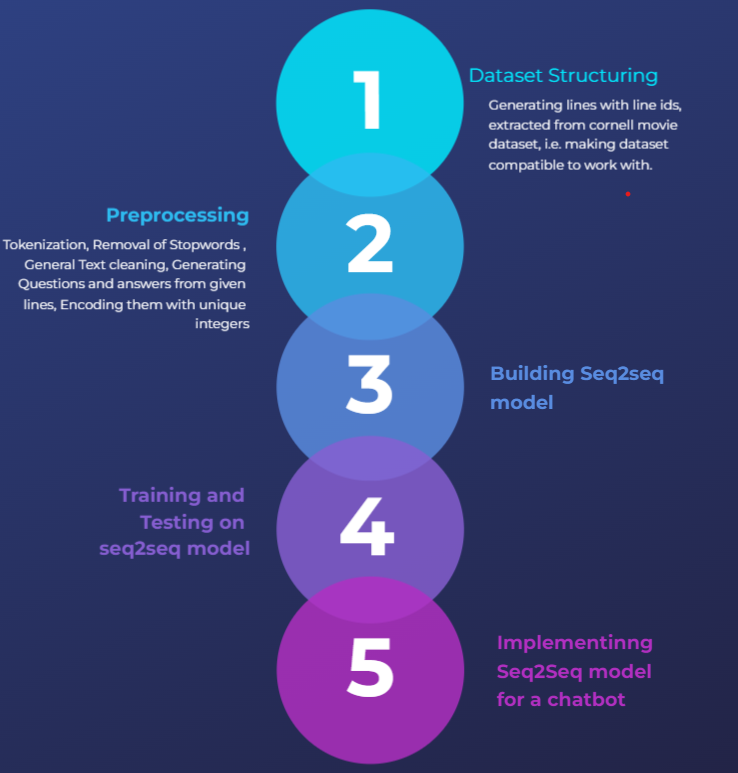